In [64]:
import fasttext
import numpy as np
from nltk import tokenize,stem
import pandas as pd
import config

import mystem 
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

Exception: Version mismatch: this is the 'cffi' package version 1.12.2, located in '/data/eazabrotsky/anaconda3/envs/ds/lib/python3.7/site-packages/cffi/api.py'.  When we import the top-level '_cffi_backend' extension module, we get version 1.7.0, located in '/data/eazabrotsky/anaconda3/envs/ds/lib/python3.7/site-packages/_cffi_backend.cpython-37m-x86_64-linux-gnu.so'.  The two versions should be equal; check your installation.

In [55]:
DATA_PATH = config.get_data_path()
STORIES_FILE = DATA_PATH / 'stories_processed.csv'


stories = pd.read_csv(STORIES_FILE, index_col=0,
                      converters={'all_text': eval, 'font_size': eval, 'guids': eval})


ft_model_path = DATA_PATH / '../fasttext' / 'cc.ru.300.bin'

model = fasttext.load_model(str(ft_model_path))

In [57]:
mystem = stem.snowball.RussianStemmer()

In [63]:
mystem.stem('вас очень хорошо')

'вас очень хорош'

In [34]:
tokenizer = tokenize.TweetTokenizer()


vectors = []
for text in stories['all_text']:
    text = ' '.join(text).lower()
    text = tokenizer.tokenize(text)
    vector = np.array([model[word] for word in text]).mean(axis=0)
    vectors.append(vector)

ModuleNotFoundError: No module named 'MyStem'

In [32]:
stories['urls'][0]

"['https://wiki.tcsbank.ru/pages/viewpage.action?pageId=262577789', 'https://static2.tinkoff.ru/portfolio/stories/icons/pin.png', 'https://static2.tinkoff.ru/portfolio/stories/icons/pin.png', 'https://static2.tinkoff.ru/portfolio/stories/images/57_1.png', 'https://static2.tinkoff.ru/portfolio/stories/images/57_2.png', 'https://static2.tinkoff.ru/portfolio/stories/images/57_3.png', 'https://static2.tinkoff.ru/portfolio/stories/images/57_4.png']"

In [2]:
cluster_model = AgglomerativeClustering(n_clusters=8)
clusters = cluster_model.fit_predict(vectors)
stories['clusters'] = clusters

In [4]:
from sklearn.manifold import TSNE

In [5]:
tsne = TSNE()

In [8]:
x = tsne.fit_transform(vectors)

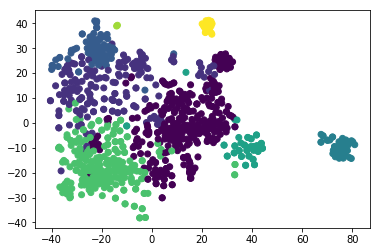

In [10]:
plt.
plt.scatter(x[:, 0], x[:, 1], c=clusters)

In [ ]:
stories.to_csv(STORIES_FILE)

In [10]:
REACTION_TRAIN_FILE = DATA_PATH / 'stories_reaction_train.csv'

In [13]:
story_reaction = pd.read_csv(REACTION_TRAIN_FILE)

In [23]:
stories_ind = stories.set_index(['story_id'],drop=True)

In [30]:
stories_ind['urls']

NameError: name 'stories_ind' is not defined

In [44]:
reac = np.unique(story_reaction['story_id'])
ids = np.unique(stories_ind.index)